<a href="https://colab.research.google.com/github/yeseul106/Cow_Contest/blob/main/LSTM_cow_contest_Predicting_Consumer_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**소비자 가격 예측하기**

30일 간 데이터를 이용하여 향후 한달 가격 예측 <br>

input shape : 12 X 30 <br>

output shape : 1 X 30






In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

'''''''''''''''read csv file'''''''''''''''
trainData = pd.read_csv('/content/drive/MyDrive/cow_contest/preprocessed_unNormalized_2015_2019.csv', encoding='cp949')
testData =  pd.read_csv('/content/drive/MyDrive/cow_contest/preprocessed_unNormalized_2020.csv', encoding='cp949')
print("2015_2019 데이터 shape :",trainData.shape)
print("2020 데이터 shape :",testData.shape)
trainData.head(5)  # 정규화까지 processing한 상태

2015_2019 데이터 shape : (1235, 16)
2020 데이터 shape : (251, 16)


,날짜,가임암소 수,도축 수,암송아지가격,숫송아지가격,소비자 심리지수,물가 총지수,물가 농축수산물지수,도체 중량,생산량,출생두수,사육비,도매 가격,소비자 가격,당해 도매 가격,당해 소비자 가격
0,20150102,571347,96045,839.000000,1370.0,102.0,99.77,99.74,413.051366,267,50325,6867510,17343,78497,14255,64390
1,20150105,571347,96045,839.333333,1430.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18445,78548,14158,65654
2,20150106,571347,96045,839.666667,1490.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18813,78738,14758,65397
3,20150107,571347,96045,840.000000,1550.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18905,76974,14838,65539
4,20150108,571347,96045,852.000000,1555.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18950,76924,14859,62858


In [9]:
'''''''''''''''seperate x and y data'''''''''''''''
# 일단 지금은 한달 가격 예측이므로 1년 뒤 도매 가격 제거
trainData = trainData.drop(columns=['소비자 가격'])

In [10]:
trainData.head(5)

,날짜,가임암소 수,도축 수,암송아지가격,숫송아지가격,소비자 심리지수,물가 총지수,물가 농축수산물지수,도체 중량,생산량,출생두수,사육비,도매 가격,당해 도매 가격,당해 소비자 가격
0,20150102,571347,96045,839.000000,1370.0,102.0,99.77,99.74,413.051366,267,50325,6867510,17343,14255,64390
1,20150105,571347,96045,839.333333,1430.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18445,14158,65654
2,20150106,571347,96045,839.666667,1490.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18813,14758,65397
3,20150107,571347,96045,840.000000,1550.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18905,14838,65539
4,20150108,571347,96045,852.000000,1555.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18950,14859,62858


In [11]:
# 도매 가격만 먼저 예측해보기 위함이므로 소비자 가격, 당해 소비자 가격 제거
trainData = trainData.drop(columns=['도매 가격', '당해 도매 가격','날짜'])
trainData.head(5)

,가임암소 수,도축 수,암송아지가격,숫송아지가격,소비자 심리지수,물가 총지수,물가 농축수산물지수,도체 중량,생산량,출생두수,사육비,당해 소비자 가격
0,571347,96045,839.000000,1370.0,102.0,99.77,99.74,413.051366,267,50325,6867510,64390
1,571347,96045,839.333333,1430.0,102.0,99.77,99.74,413.051366,267,50325,6867510,65654
2,571347,96045,839.666667,1490.0,102.0,99.77,99.74,413.051366,267,50325,6867510,65397
3,571347,96045,840.000000,1550.0,102.0,99.77,99.74,413.051366,267,50325,6867510,65539
4,571347,96045,852.000000,1555.0,102.0,99.77,99.74,413.051366,267,50325,6867510,62858


In [12]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [13]:
# 정규화 0-1로 하기
data_normalizer = preprocessing.MinMaxScaler() # 데이터를 0~1 범위로 점철되게 하는 함수 call
data_normalized = data_normalizer.fit_transform(trainData) # 데이터를 0~1 범위로 점철되게 함수 수행
next_month_price = data_normalized[:,-1]
data_normalized.shape

(1235, 12)

In [14]:
data_normalized[0]

array([0.        , 0.90674595, 0.        , 0.        , 0.46524064,
       0.01010101, 0.10323959, 0.56561515, 1.        , 0.10628024,
       0.        , 0.09570254])

In [15]:
print(next_month_price.shape)
next_month_price[0]

(1235,)


0.09570253986218846

In [16]:
# using the last {history_points} open close high low volume data points, predict the next open value
history_points = 30  # 30일을 기준으로 바라본다
trainData_normalized = np.array([data_normalized[i:i + history_points].copy() for i in range(len(data_normalized) - history_points)]) # trainData를 가지고 오되, 관찰일수 만큼 누적해서 쌓는다. (열방향으로)
print('trainData_normalized : ', trainData_normalized.shape)

trainData_normalized :  (1205, 30, 12)


In [17]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [18]:
next_month_price_normalized = np.array([next_month_price[i:i + history_points].copy() for i in range(len(next_month_price) - history_points)])
next_month_price_normalized = np.expand_dims(next_month_price_normalized, -1) # 1XN 벡터 -> NX1 벡터로
print('next_month_price_normalized shape: ', next_month_price_normalized.shape)

next_month_price_unNormalized = trainData['당해 소비자 가격']
print('next_month_price_unNormalized shape: ', next_month_price_unNormalized.shape)

y_normalizer = preprocessing.MinMaxScaler()
next_month_price_unNormalized_2 = np.expand_dims(next_month_price_unNormalized, -1) # 1XN 벡터 -> NX1 벡터로
y_normalizer.fit(next_month_price_unNormalized_2)

next_month_price_unNormalized = np.array([next_month_price_unNormalized[i:i + history_points].copy() for i in range(len(next_month_price_unNormalized) - history_points)])
next_month_price_unNormalized = np.expand_dims(next_month_price_unNormalized, -1) # 1XN 벡터 -> NX1 벡터로
print('next_month_price_unNormalized shape: ', next_month_price_unNormalized.shape)

next_month_price_normalized shape:  (1205, 30, 1)
next_month_price_unNormalized shape:  (1235,)
next_month_price_unNormalized shape:  (1205, 30, 1)


In [19]:
next_month_price_unNormalized[0]

array([[64390],
       [65654],
       [65397],
       [65539],
       [62858],
       [62858],
       [62440],
       [62440],
       [62235],
       [65114],
       [64923],
       [65555],
       [65721],
       [65721],
       [66428],
       [66300],
       [66831],
       [66754],
       [66376],
       [66855],
       [66725],
       [66725],
       [67435],
       [67610],
       [65660],
       [65723],
       [65331],
       [65844],
       [65844],
       [66495]])

In [20]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation
from keras import optimizers
import numpy as np
np.random.seed(4)
# from tensorflow import set_random_seed
print(tf.__version__)
tf.random.set_seed(44)
# from util import csv_to_dataset, history_points

# dataset

#ohlcv_histories, _, next_day_open_values, unscaled_y, y_normaliser = call_dataset(ticker=ticker)

train_ratio = 0.9
n = int(trainData_normalized.shape[0] * train_ratio)

trainData = trainData_normalized[-n:-1]
y_train_real = next_month_price_unNormalized[-n:-1]
y_train = next_month_price_normalized[-n:-1]

validData = trainData_normalized[:trainData_normalized.shape[0]-n]
y_valid_real = next_month_price_unNormalized[:trainData_normalized.shape[0]-n]
y_valid = next_month_price_normalized[:trainData_normalized.shape[0]-n]

unscaled_y_valid = next_month_price_unNormalized[:trainData_normalized.shape[0]-n]

print('trainData.shape: ', trainData.shape)
print('validData.shape: ',validData.shape)
print('y_train_real.shape: ',y_train_real.shape)
print('y_train.shape: ', y_train.shape)
print('y_valid.shape: ',y_valid.shape)

2.6.0
trainData.shape:  (1083, 30, 12)
validData.shape:  (121, 30, 12)
y_train_real.shape:  (1083, 30, 1)
y_train.shape:  (1083, 30, 1)
y_valid.shape:  (121, 30, 1)


In [21]:
# model architecture
lstm_input = Input(shape=(history_points, 12), name='lstm_input')
x = LSTM(30, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
# x = Dense(128, name='dense_0')(x)
# x = Dropout(0.3, name='lstm_dropout_1')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(30, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)

model = Model(inputs=lstm_input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(0.0005), loss='mse')
model.fit(x=trainData, y=y_train, batch_size=32, epochs=100)
# evaluation

y_valid_predicted = model.predict(validData)
y_valid_predicted = y_normalizer.inverse_transform(y_valid_predicted)
y_predicted = model.predict(trainData)
y_predicted = y_normalizer.inverse_transform(y_predicted)

print('y_valid_predict shape: ', y_valid_predicted.shape)
print('y_predicted  shape: ', y_predicted .shape)

# unscaled_y_valid = unscaled_y_valid.reshape(*unscaled_y_valid.shape[:-1])
# y_valid = y_valid.reshape(*y_valid.shape[:-1])
# print('unscaled_y_valid  shape: ', unscaled_y_valid .shape)
# print('y_valid  shape: ', y_valid .shape)

# 한달 뒤의 가격 예측인데 ... 어떻게 계산해야할까나?....
# real_mse = np.mean(np.square(unscaled_y_valid - y_valid_predicted))
# scaled_mse = real_mse / (np.max(unscaled_y_valid) - np.min(unscaled_y_valid)) * 100
# print(scaled_mse)

Epoch 1/100
34/34 [==============================] - 2s 13ms/step - loss: 0.4057
Epoch 2/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0783
Epoch 3/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0208
Epoch 4/100
34/34 [==============================] - 0s 12ms/step - loss: 0.0169
Epoch 5/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0154
Epoch 6/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0137
Epoch 7/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0121
Epoch 8/100
34/34 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 9/100
34/34 [==============================] - 0s 12ms/step - loss: 0.0095
Epoch 10/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0088
Epoch 11/100
34/34 [==============================] - 0s 10ms/step - loss: 0.0079
Epoch 12/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 13/100
34/34 [=====

In [22]:
y_valid.min()

0.0

In [23]:
y_valid_predicted.min()

69156.33

In [24]:
# # 1년치 데이터를 그래프로 그리기 위해 flatten
y_valid_real = y_valid_real.flatten()
y_valid_predicted = y_valid_predicted.flatten()

print(y_valid_real.shape[0] // 30)

draw_real_valid = []
draw_pred_valid = []

# # 30일 단위로 예측을 했으므로 30일 간격을 가진 채로 이어붙이기
idx = 0
while idx < y_valid_real.shape[0]:
  draw_real_valid.append(y_valid_real[idx])
  draw_pred_valid.append(y_valid_predicted[idx])
  idx += 30

# draw_real_valid[0:60]


121


In [25]:
# # 1년치 데이터를 그래프로 그리기 위해 flatten
y_train_real = y_train_real.flatten()
y_predicted = y_predicted.flatten()

print(y_train_real.shape[0] // 30)

draw_real = []
draw_pred = []

# # 30일 단위로 예측을 했으므로 30일 간격을 가진 채로 이어붙이기
idx = 0
while idx < y_train_real.shape[0]:
  draw_real.append(y_train_real[idx])
  draw_pred.append(y_predicted[idx])
  idx += 30

# draw_real_valid[0:60]

1083


In [26]:
print(len(draw_pred))

1083


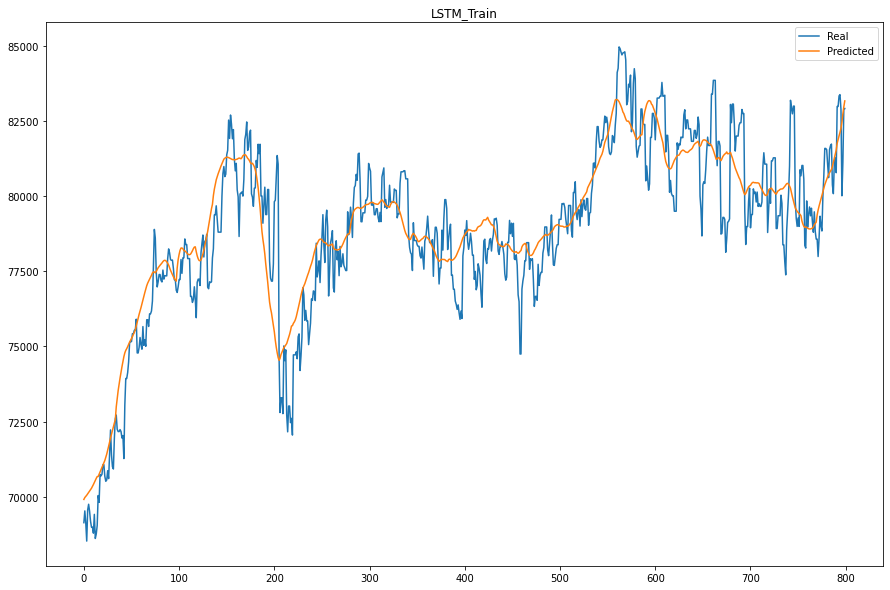

In [27]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 10, forward=True)

start = 0
end = -1

real = plt.plot(draw_real[start:800], label='real')
pred = plt.plot(draw_pred[start:800], label='predicted')

plt.legend(['Real', 'Predicted'])
plt.title('LSTM_Train')
plt.show()

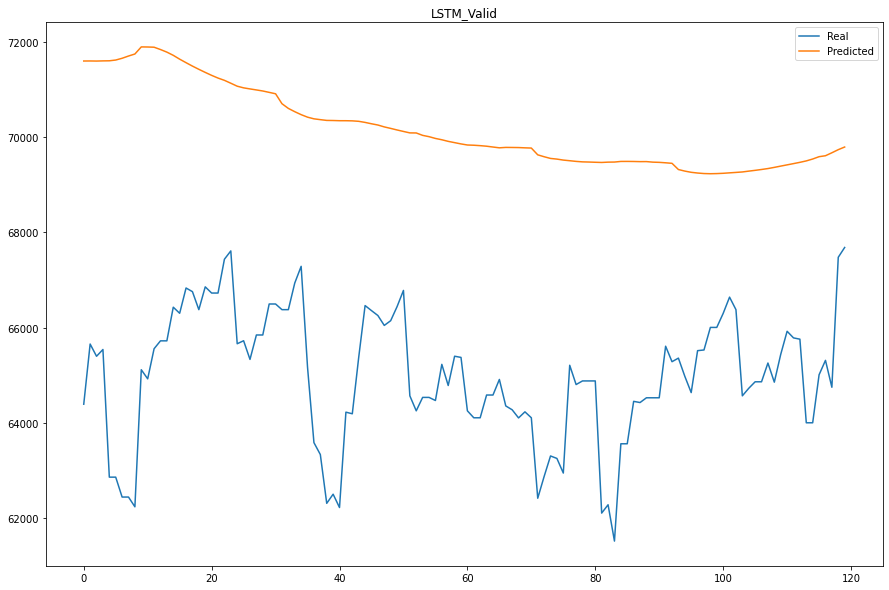

In [28]:
# 1년치 데이터를 그래프로 그리기 위해 flatten
# draw_real_valid = y_valid_real.flatten()
# draw_pred_valid = y_valid_predicted.flatten()

import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 10, forward=True)

start = 0
end = -1

real = plt.plot(draw_real_valid[start:120], label='real')
pred = plt.plot(draw_pred_valid[start:120], label='predicted')

plt.legend(['Real', 'Predicted'])
plt.title('LSTM_Valid')
plt.show()

In [29]:
# real data
draw_real[1]

69524

In [30]:
# predict data
draw_pred[0]

69906.35

In [31]:
print('-------------Train-------------')
for i in range(30):
  print('실제 가격 : ' , draw_real[i], end="")
  print(' / 예측 가격 : ', draw_pred[i])

-------------Train-------------
실제 가격 :  69132 / 예측 가격 :  69906.35
실제 가격 :  69524 / 예측 가격 :  69969.8
실제 가격 :  69120 / 예측 가격 :  70006.93
실제 가격 :  68519 / 예측 가격 :  70046.945
실제 가격 :  69557 / 예측 가격 :  70092.914
실제 가격 :  69746 / 예측 가격 :  70134.17
실제 가격 :  69511 / 예측 가격 :  70179.19
실제 가격 :  69180 / 예측 가격 :  70227.53
실제 가격 :  68983 / 예측 가격 :  70278.84
실제 가격 :  68983 / 예측 가격 :  70338.15
실제 가격 :  68783 / 예측 가격 :  70402.54
실제 가격 :  69409 / 예측 가격 :  70472.52
실제 가격 :  68606 / 예측 가격 :  70536.85
실제 가격 :  68756 / 예측 가격 :  70608.1
실제 가격 :  69039 / 예측 가격 :  70668.08
실제 가격 :  70036 / 예측 가격 :  70669.22
실제 가격 :  69809 / 예측 가격 :  70745.46
실제 가격 :  70737 / 예측 가격 :  70825.125
실제 가격 :  70689 / 예측 가격 :  70896.54
실제 가격 :  70744 / 예측 가격 :  70965.58
실제 가격 :  71064 / 예측 가격 :  71041.445
실제 가격 :  71064 / 예측 가격 :  71119.33
실제 가격 :  70678 / 예측 가격 :  71202.84
실제 가격 :  70511 / 예측 가격 :  71303.55
실제 가격 :  70553 / 예측 가격 :  71415.414
실제 가격 :  70864 / 예측 가격 :  71544.0
실제 가격 :  70600 / 예측 가격 :  71677.13
실제 가격 :  71420 / 예측 가

In [32]:
print('-------------Train-------------')
for i in range(30):
  print('실제 가격 - 예측 가격 : ', draw_real[i] - draw_pred[i])

-------------Train-------------
실제 가격 - 예측 가격 :  -774.3515625
실제 가격 - 예측 가격 :  -445.796875
실제 가격 - 예측 가격 :  -886.9296875
실제 가격 - 예측 가격 :  -1527.9453125
실제 가격 - 예측 가격 :  -535.9140625
실제 가격 - 예측 가격 :  -388.171875
실제 가격 - 예측 가격 :  -668.1875
실제 가격 - 예측 가격 :  -1047.53125
실제 가격 - 예측 가격 :  -1295.84375
실제 가격 - 예측 가격 :  -1355.1484375
실제 가격 - 예측 가격 :  -1619.5390625
실제 가격 - 예측 가격 :  -1063.5234375
실제 가격 - 예측 가격 :  -1930.8515625
실제 가격 - 예측 가격 :  -1852.1015625
실제 가격 - 예측 가격 :  -1629.078125
실제 가격 - 예측 가격 :  -633.21875
실제 가격 - 예측 가격 :  -936.4609375
실제 가격 - 예측 가격 :  -88.125
실제 가격 - 예측 가격 :  -207.5390625
실제 가격 - 예측 가격 :  -221.578125
실제 가격 - 예측 가격 :  22.5546875
실제 가격 - 예측 가격 :  -55.328125
실제 가격 - 예측 가격 :  -524.84375
실제 가격 - 예측 가격 :  -792.546875
실제 가격 - 예측 가격 :  -862.4140625
실제 가격 - 예측 가격 :  -680.0
실제 가격 - 예측 가격 :  -1077.1328125
실제 가격 - 예측 가격 :  -401.453125
실제 가격 - 예측 가격 :  269.0078125
실제 가격 - 예측 가격 :  -680.6171875


In [33]:
print('-------------Test-------------')
for i in range(30):
  print('실제 가격 : ' , draw_real_valid[i], end="")
  print(' / 예측 가격 : ', draw_pred_valid[i])

-------------Test-------------
실제 가격 :  64390 / 예측 가격 :  71598.49
실제 가격 :  65654 / 예측 가격 :  71599.484
실제 가격 :  65397 / 예측 가격 :  71597.55
실제 가격 :  65539 / 예측 가격 :  71601.05
실제 가격 :  62858 / 예측 가격 :  71603.086
실제 가격 :  62858 / 예측 가격 :  71619.086
실제 가격 :  62440 / 예측 가격 :  71655.98
실제 가격 :  62440 / 예측 가격 :  71703.266
실제 가격 :  62235 / 예측 가격 :  71745.79
실제 가격 :  65114 / 예측 가격 :  71894.74
실제 가격 :  64923 / 예측 가격 :  71892.875
실제 가격 :  65555 / 예측 가격 :  71888.305
실제 가격 :  65721 / 예측 가격 :  71839.5
실제 가격 :  65721 / 예측 가격 :  71785.19
실제 가격 :  66428 / 예측 가격 :  71717.85
실제 가격 :  66300 / 예측 가격 :  71637.336
실제 가격 :  66831 / 예측 가격 :  71563.39
실제 가격 :  66754 / 예측 가격 :  71491.484
실제 가격 :  66376 / 예측 가격 :  71424.08
실제 가격 :  66855 / 예측 가격 :  71359.4
실제 가격 :  66725 / 예측 가격 :  71297.18
실제 가격 :  66725 / 예측 가격 :  71240.305
실제 가격 :  67435 / 예측 가격 :  71192.54
실제 가격 :  67610 / 예측 가격 :  71131.97
실제 가격 :  65660 / 예측 가격 :  71069.445
실제 가격 :  65723 / 예측 가격 :  71034.82
실제 가격 :  65331 / 예측 가격 :  71012.234
실제 가격 :  65844 

In [34]:
print('-------------Test-------------')
for i in range(30):
  print('실제 가격 - 예측 가격 : ', draw_real_valid[i] - draw_pred_valid[i])

-------------Test-------------
실제 가격 - 예측 가격 :  -7208.4921875
실제 가격 - 예측 가격 :  -5945.484375
실제 가격 - 예측 가격 :  -6200.546875
실제 가격 - 예측 가격 :  -6062.046875
실제 가격 - 예측 가격 :  -8745.0859375
실제 가격 - 예측 가격 :  -8761.0859375
실제 가격 - 예측 가격 :  -9215.9765625
실제 가격 - 예측 가격 :  -9263.265625
실제 가격 - 예측 가격 :  -9510.7890625
실제 가격 - 예측 가격 :  -6780.7421875
실제 가격 - 예측 가격 :  -6969.875
실제 가격 - 예측 가격 :  -6333.3046875
실제 가격 - 예측 가격 :  -6118.5
실제 가격 - 예측 가격 :  -6064.1875
실제 가격 - 예측 가격 :  -5289.8515625
실제 가격 - 예측 가격 :  -5337.3359375
실제 가격 - 예측 가격 :  -4732.390625
실제 가격 - 예측 가격 :  -4737.484375
실제 가격 - 예측 가격 :  -5048.078125
실제 가격 - 예측 가격 :  -4504.3984375
실제 가격 - 예측 가격 :  -4572.1796875
실제 가격 - 예측 가격 :  -4515.3046875
실제 가격 - 예측 가격 :  -3757.5390625
실제 가격 - 예측 가격 :  -3521.96875
실제 가격 - 예측 가격 :  -5409.4453125
실제 가격 - 예측 가격 :  -5311.8203125
실제 가격 - 예측 가격 :  -5681.234375
실제 가격 - 예측 가격 :  -5147.015625
실제 가격 - 예측 가격 :  -5124.859375
실제 가격 - 예측 가격 :  -4444.796875
